In [206]:
ITERATIONS = 100
TEST_SIZE = 0.3
FEATURES = ['incident_classification', 'alarm_box_borough']
TARGET_ATTRIBUTE = 'engines_assigned_quantity'
SAVE_AS = 'version-01'

In [207]:
import pandas as pd
from pathlib import Path

df = pd.read_csv(f'{Path.cwd()}/../preparedData/incidents.csv')

df = df.sample(n=50000)

df.head()

,alarm_box_location,alarm_box_borough,incident_classification,incident_classification_group,incident_travel_tm_seconds_qy,incident_datetime,engines_assigned_quantity,ladders_assigned_quantity,other_units_assigned_quantity,incident_timestamp,alarm_box_latitude,alarm_box_longtitude,nearest_fire_station_latitude,nearest_fire_station_longitude
1790442,CLASSON AVE & FULTON ST,BROOKLYN,Alarm System - Testing,NonMedical Emergencies,396.0,2020-09-05 18:52:50,1.0,1.0,0.0,1.599332e+09,40.681742,-73.958586,40.804946,-73.962932
1442885,BERGEN AVE & E 149 ST,BRONX,Assist Civilian - Non-Medical,NonMedical Emergencies,285.0,2011-07-18 09:56:35,0.0,1.0,0.0,1.310983e+09,40.815699,-73.916771,40.876945,-73.903669
1155851,WYCKOFF AVE & HIMROD ST,BROOKLYN,Assist Civilian - Non-Medical,NonMedical Emergencies,597.0,2010-03-07 09:05:44,1.0,0.0,0.0,1.267953e+09,40.702953,-73.917050,40.731494,-73.983407
19174,HOE AVE & ALDUS ST,BRONX,Utility Emergency - Water,NonMedical Emergencies,613.0,2021-02-01 17:04:00,0.0,1.0,0.0,1.612199e+09,40.823144,-73.890420,40.737914,-73.851944
653520,89 AVE & VAN WYCK XWAY W SVC RD,QUEENS,Medical - Assist Civilian,Medical Emergencies,237.0,2007-09-05 22:03:12,1.0,0.0,0.0,1.189030e+09,40.701313,-73.816342,40.694829,-73.846238


In [208]:
features = df[FEATURES]

text_features = []

for column in features.columns:
  try:
    features[column].astype(float)
  except ValueError:
    text_features.append(column)

print(text_features)

['incident_classification', 'alarm_box_borough']


In [209]:
dummies = pd.get_dummies(features, columns=text_features, dtype=int)

features = pd.concat([features, dummies], axis=1)

features = features.drop(columns=text_features)

features.head()

,incident_classification_Abandoned Derelict Vehicle Fire,incident_classification_Alarm System - Defective,incident_classification_Alarm System - Other,incident_classification_Alarm System - Recorded,incident_classification_Alarm System - Testing,incident_classification_Alarm System - Unnecessary,incident_classification_Alarm System - Unwarranted,incident_classification_Assist Civilian - Non-Medical,incident_classification_Automobile Fire,incident_classification_Brush Fire,...,incident_classification_Utility Emergency - Steam,incident_classification_Utility Emergency - Undefined,incident_classification_Utility Emergency - Water,incident_classification_Vehicle Accident - Other,incident_classification_Vehicle Accident - With Extrication,alarm_box_borough_BRONX,alarm_box_borough_BROOKLYN,alarm_box_borough_MANHATTAN,alarm_box_borough_QUEENS,alarm_box_borough_RICHMOND / STATEN ISLAND
1790442,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1442885,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1155851,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
19174,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
653520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
target = df[TARGET_ATTRIBUTE]

target.head()

1790442    1.0
1442885    0.0
1155851    1.0
19174      0.0
653520     1.0
Name: engines_assigned_quantity, dtype: float64

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

Errors [0.5152957277044984, 3.659002405803143e+16, 1980807669022471.0, 3.136086786719746e+16, 2.1104035859461532e+16, 2.521319070976572e+20, 7.428099259550674e+16, 0.6670880160290471, 0.5087343008569267, 2321769271658923.0, 0.619211673018379, 0.5822397986819647, 0.6026517386092494, 9.589904797541449e+17, 1.7381751214590113e+20, 0.6444219756386553, 0.55604738697956, 7.921429495829317e+16, 3.8315393996423917e+17, 5.374446357735269e+16, 1.2558981692867328e+16, 9762323146377620.0, 8871496254350176.0, 0.6970242367406213, 1.4761052516469214e+16, 2.7699602880800524e+16, 0.6303189906169816, 0.5203140190469683, 238986428310605.72, 4627458001822982.0, 0.601657609163962, 3.0911941458239724e+20, 0.6366481785955771, 0.5705787175968755, 0.604546924125993, 1.2746630422376804e+16, 263914093911398.75, 0.6060939146624694, 7.913479475473861e+16, 8112336476530793.0, 6.676497292695368e+17, 0.6658158328250422, 3.175478857582329e+20, 608746308980133.6, 0.5421591016278137, 0.5222160125076195, 0.50851221268426

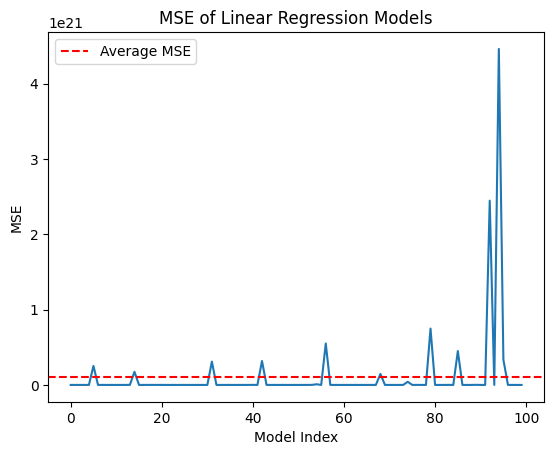

In [212]:
import matplotlib.pyplot as plt
import numpy as np

average_error = np.mean(errors)

plt.plot(errors)
plt.axhline(average_error, color='r', linestyle='--', label='Average MSE')
plt.xlabel('Model Index')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Models')
plt.legend()
plt.show()

In [213]:
best_model_index = errors.index(min(errors))
best_model = models[best_model_index]

print('Best Model MSE', min(errors))

Best Model MSE 0.5085122126842694


In [214]:
pd.DataFrame(list(zip(best_model.feature_names_in_, best_model.coef_)))

,0,1
0,incident_classification_Abandoned Derelict Veh...,-1.634356e+10
1,incident_classification_Alarm System - Defective,-1.634356e+10
2,incident_classification_Alarm System - Other,-1.634356e+10
3,incident_classification_Alarm System - Recorded,-1.634356e+10
4,incident_classification_Alarm System - Testing,-1.634356e+10
...,...,...
77,alarm_box_borough_BRONX,-2.128267e+10
78,alarm_box_borough_BROOKLYN,-2.128267e+10
79,alarm_box_borough_MANHATTAN,-2.128267e+10
80,alarm_box_borough_QUEENS,-2.128267e+10


In [215]:
import joblib
from pathlib import Path

joblib.dump(best_model, f'{Path.cwd()}/../models/model.pkl')

joblib.dump(FEATURES, f'{Path.cwd()}/../models/features.pkl')
joblib.dump(TARGET_ATTRIBUTE, f'{Path.cwd()}/../models/target.pkl')

['/Users/loic.doerr/dev/ny-emergency-ai/src/../models/target.pkl']